In [18]:
import tensorflow as tf
import numpy as np
import sys
sys.path.append('../')
import utils.preprocess as preprocess

In [19]:
pre = preprocess.preprocess("D:/DataSet/CICIDS2017/CSV/Wednesday-workingHours.pcap_ISCX.csv", labelColumnName='Label')
X_train, X_test, y_train, y_test = pre.preprocessing()

In [20]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [56]:
import utils.network.network5 as model
from utils.metrics import metric

In [57]:
net = model.MyLstmModel()

In [58]:
algorithm = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, momentum=0.89, epsilon=1e-07, centered=False, name='RMSprop')
net.compile(optimizer=algorithm, loss='categorical_crossentropy', metrics=metric())

In [59]:
from tensorflow.keras import callbacks
import datetime
dir_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S-network5-RMSprop")
logdir = os.path.join("../tensorboard", dir_name)
tensorboard_callback = callbacks.TensorBoard(logdir, histogram_freq=1)
# lrate = callbacks.LearningRateScheduler(opt_.exp_decay)

In [60]:
import numpy as np
model_ = net.fit(X_train, y_train, epochs=20, batch_size=512, validation_split=0.3, callbacks=[tensorboard_callback], verbose=1) # lrate

==] - 40s 61ms/step - loss: 0.1353 - acc: 0.4280 - tp: 298552.0000 - fp: 7906.0000 - tn: 669670.0000 - fn: 40236.0000 - categorical_accuracy: 0.9397 - categorical_crossentropy: 0.1353 - precision: 0.9742 - recall: 0.8812 - auc: 0.9913 - val_loss: 0.0710 - val_acc: 0.5045 - val_tp: 140868.0000 - val_fp: 3773.0000 - val_tn: 286619.0000 - val_fn: 4328.0000 - val_categorical_accuracy: 0.9729 - val_categorical_crossentropy: 0.0710 - val_precision: 0.9739 - val_recall: 0.9702 - val_auc: 0.9965
Epoch 5/40
662/662 [==============================] - 39s 59ms/step - loss: 0.1323 - acc: 0.4323 - tp: 298942.0000 - fp: 7808.0000 - tn: 669768.0000 - fn: 39846.0000 - categorical_accuracy: 0.9408 - categorical_crossentropy: 0.1323 - precision: 0.9745 - recall: 0.8824 - auc: 0.9915 - val_loss: 0.0725 - val_acc: 0.5385 - val_tp: 140958.0000 - val_fp: 3691.0000 - val_tn: 286701.0000 - val_fn: 4238.0000 - val_categorical_accuracy: 0.9736 - val_categorical_crossentropy: 0.0725 - val_precision: 0.9745 - val

In [61]:
from utils.evl_metrics import confusion_matrix, eva_metric
y_pred = net.predict(X_test)
y_class = np.argmax(y_pred, axis=1)
y_label = np.argmax(y_test, axis=1)
confusion_matrix(y_label, y_class)
eva_metric(y_label, y_class)


TrueNegatives result:  127878.0
TruePositives result:  74657.0
FalseNegatives result:  923.0
FalsePositives result:  3964.0
Recall result:  0.9877878
Precision result:  0.9495809


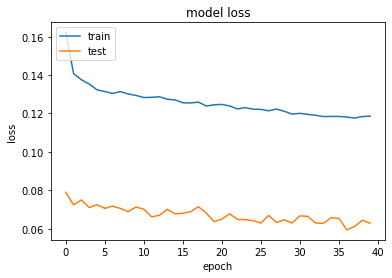

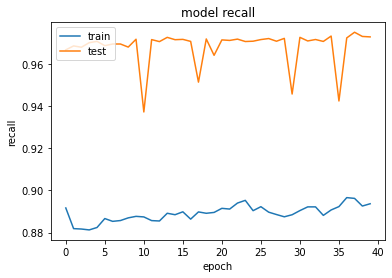

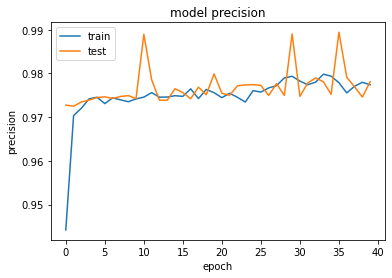

In [62]:
import utils.graph as fig
fig.add_dir(dir_name)
fig.loss_graph(model_,dir_name)
fig.recall_graph(model_,dir_name)
fig.precision_graph(model_,dir_name)